<img src="https://mma.prnewswire.com/media/357911/Santander_Logo.jpg?p=publish" alt="drawing" width="300"/><br>
Santander Bank, N. A., formerly Sovereign Bank, is a wholly owned subsidiary of the Spanish Santander Group. It is based in Boston and its principal market is the northeastern United States. It has $57.5 billion in deposits, operates about 650 retail banking offices and over 2,000 ATMs, and employs approximately 9,800 people. It offers an array of financial services and products including retail banking, mortgages, corporate banking, cash management, credit card, capital markets, trust and wealth management, and insurance.<br>


---


### *Santander Customer Transaction Prediction*
In this challenge, you have to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data.<br> Kaggle dataset: https://www.kaggle.com/c/-customer-transaction-prediction/data


# Read Dataset

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Reading data
import pandas as pd
train = pd.read_csv('/content/gdrive/MyDrive/Case Studies/Santander Customer Transaction Prediction/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Case Studies/Santander Customer Transaction Prediction/test.csv')

# Shape of the data
print(f'Train data: {train.shape}')
print(f'Test data: {test.shape}')

Train data: (200000, 202)
Test data: (200000, 201)


In [ ]:
# Head of train data
train.head(3)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965


In [ ]:
# Checking for null values
train.isnull().values.any()

False

# Feature Statistics and Exploratory Data Analysis

In [ ]:
# Test for Normality

from scipy.stats import normaltest, shapiro

def normaltest_test(df):
  """
  Test for normality of continuous variables
  - D’Agostino’s K-squared test
  - If the p-value ≤ alpha, we assume the distribution of our variable is not gaussian.
  """
  var = []
  alpha = 0.01
  for i in df.columns.values:
    p_value = normaltest(train[i].to_numpy())[1]
    if p_value > alpha:
      var.append(i)
  if var == []:
    print('D’Agostino’s K-squared test: None of the features follow gaussian distribution')
  else:
    print(f'D’Agostino’s K-squared test: Features following gaussian distribution are {var}')

def shapiro_test(df):
  """
  Test for normality of continuous variables
  - Shapiro-Wilk test is believed to be more reliable test of normality
  - If the p-value ≤ alpha, we assume the distribution of our variable is not gaussian.
  """
  var = []
  alpha = 0.01
  for i in df.columns.values:
    p_value = shapiro(train[i].to_numpy())[1]
    if p_value > alpha:
      var.append(i)
  if var == []:
    print('shapiro test: None of the features follow gaussian distribution')
  else:
    print(f'shapiro test: Features following gaussian distribution are {var}')

normaltest_test(train.iloc[:, 2:])
shapiro_test(train.iloc[:, 2:])

D’Agostino’s K-squared test: None of the features follow gaussian distribution
shapiro test: None of the features follow gaussian distribution


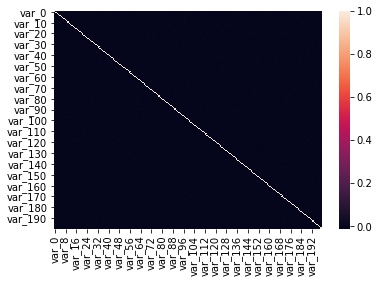

In [ ]:
# Checking Correlation amongst Explanatory Variables
corr = train.iloc[:, 2:].corr()
sns.heatmap(corr);

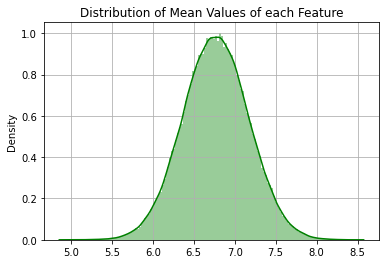

In [ ]:
# Checking Distribution of Mean of Features
import seaborn as sns
import matplotlib.pyplot as plt

mean_values = train.iloc[:, 2:].mean(axis=1)
plt.title("Distribution of Mean Values of each Feature")
plt.grid()
sns.distplot(mean_values,color="green", kde=True, bins=150);

In [ ]:
p_value = shapiro(mean_values.values)[1]
if p_value > 0.01:
  print('Shapiro test: Mean of all features is normally distributed')

p_value = normaltest(mean_values.values)[1]
if p_value > 0.01:
  print('D’Agostino’s K-squared test: Mean of all features is normally distributed')

Shapiro test: Mean of all features is normally distributed
D’Agostino’s K-squared test: Mean of all features is normally distributed


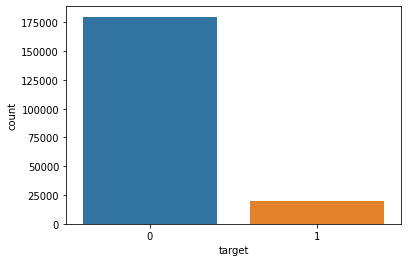

In [ ]:
# Counting Dependent Variable
sns.countplot(train.iloc[:, 1]);

In [ ]:
pd.DataFrame(round(train.iloc[:, 1].value_counts(normalize=True)*100))

,target
0,90.0
1,10.0


**Interpretations**
- None of the features are normally distributed. D’Agostino’s K-squared test and Shapiro Wilk test have given very low probability scores.
- Mean of the features are normally disributed. This has been verified using graphical representation as well as statistical tests (Shapiro test and D’Agostino’s K-squared test). 
- None of the independent features are correlated, which means there is no dependency of one feature on another feature. 
- Dataset is highly imbalanced. It shows that 90% of people have not transacted(label 0) and just 10% have transacted (label 1)
